In [1]:
import matplotlib
from matplotlib.pyplot import *
from numpy import *

1) Newton's Method

In [2]:
def f(x):
    return x**3/3-2*x**2+x-4
def df(x):
    return x**2-4*x+1

def newton(f,df,x0):
    x = [x0]
    for i in range(10):
        x.append (x[-1]-f(x[-1])/df(x[-1])) #append adds new elements to the list
    return x[-1] #picking -1 implies taking the last element from the list and keep computing the estimation

newton(f,df,5.75) #plot to use a good point

5.838208095398307

2) Secant Method

In [3]:
def f(x):
    return x**3/3-2*x**2+x-4

def secant(f,x0,xm1):
    x = [xm1,x0]
    for i in range(10):
        x.append ((x[-1]*f(x[-2])-x[-2]*f(x[-1]))/(f(x[-2])-f(x[-1])))
    return x[-1]
                  
secant(f,8,5)

5.838208095398307

3) Bisection Method

In [4]:
def f(x):
    return x**3/3-2*x**2+x-4

def bisection(f,a,b):
    for k in range(10):
        c = (a+b)/2                #find midpoint
        if abs (f(c)) < 10**(-10): #estimated root super close to the root
            return c               #thus our c is found
        if f(a)*f(c)<0:            #here we know that the root is between a and c
            b=c                    #now we estimate between a and c
        else:
            a=c                    #if not between a and c then root is between c and b
    return c
            
bisection(f,5.5,6.5)

5.8388671875

Checking Newton's, Secant, and Bisection

In [5]:
roots([1/3,-2,1,-4])

array([5.8382081 +0.j        , 0.08089595+1.43139129j,
       0.08089595-1.43139129j])

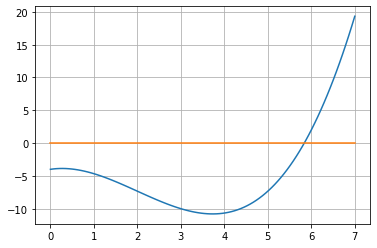

In [6]:
xs = linspace(0,7,100)
ys = [f(x) for x in xs]
plot(xs,ys)
xs = linspace(0,7,100)
ys= [0 for x in xs]
plot(xs,ys)
grid()

4) Lagrange Interpolation

In [45]:
def fu(x,i,xs):
    xi = xs[i]
    res = 1;
    for xj in xs:
        if xj!= xi:
            res = res*(x-xj)/(xi-xj)
    return res

def lagrange(x):
    res = 0;
    for i in range(len(ys)):
        res = res + ys[i]*fu(x,i,xs)
    return res

0.8402717495092548


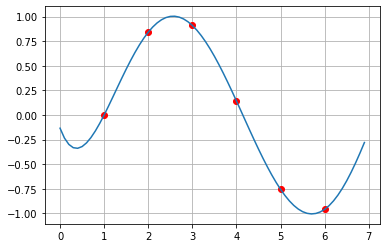

In [46]:
xs = [1,2,3,4,5,6];
ys = [0,0.841471,0.909297,0.14112,-0.756802,-0.958924];
print(lagrange(pi))

xd = arange(0,7,0.1)
plot(xs,ys,'ro')
plot(xd,lagrange(xd))
grid()

5) Polynomial Fit

In [9]:
def findas(m,xs,ys):
    A= array([[0]*(m+1)]*(m+1))    #creating an empty matrix
    b= array([0]*(m+1))            #creating an empty vector
    for k in range(m+1):           #filling in A and b with values
        b[k]= sum(ys*xs**k)        #following from the formula
        for i in range(m+1):
            A[k,i]= sum(xs**(k+i)) #following from the formula
    coefs= linalg.solve(A,b)
    print (coefs)                  #coefficients of the linear equation
    def fit(x):
        return sum(coefs*(x**array(range(len(coefs)))))
    return fit

[-4.75       -0.00892857  1.0625    ]


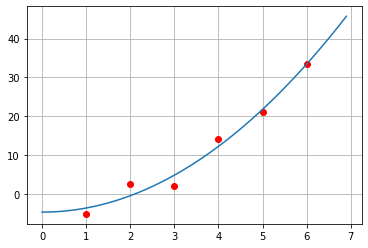

In [43]:
xs = array([1,2,3,4,5,6]);
ys = array([-5.21659,2.53152,2.05687,14.1135,20.9673,33.5652]);
ft = findas(2,xs,ys)

xd = arange(0,7,0.1)
fitlist = list(map(lambda x: ft(x),xd))

plot(xs,ys,'ro')
plot(xd,fitlist)
grid()

6) Numerical Differentiation & 7) Richardson Extrapolation

In [11]:
def f(x):
    return cos(x)
def df(x):
    return -sin(x)

def dfaprox(x,h):
    return ((f(x+h)-f(x-h))/(2*h))   #formula for derivative

def ddfapprox(x,h):
    return((f(x+h)-2*f(x)+f(x-h))/h**2)  #formula for second derivative

dfaprox(1,1/10)-df(1)      #use x=1 and h=1/10 if Q doesn't specify

0.0014017505824611698

In [12]:
def error(x,h):
    return dfaprox(x,h)-df(x)

error(1,1/100)

1.4024446293614545e-05

In [13]:
for i in range(1,17):          #python can't differentiate between 10**-16 and 0 so we go up to 16
    h= 1/10**i
    print("h=",h,"error is",error(1,h))

h= 0.1 error is 0.0014017505824611698
h= 0.01 error is 1.4024446293614545e-05
h= 0.001 error is 1.4024518812938425e-07
h= 0.0001 error is 1.4025285377528007e-09
h= 1e-05 error is 1.086408740746947e-11
h= 1e-06 error is 2.7517321754544355e-11
h= 1e-07 error is -3.055495856330026e-10
h= 1e-08 error is -2.5259956348833157e-09
h= 1e-09 error is -1.9179341004260664e-08
h= 1e-10 error is 2.0286526392077064e-07
h= 1e-11 error is 5.198868874733975e-06
h= 1e-12 error is -2.255670674089494e-05
h= 1e-13 error is -7.806785797215277e-05
h= 1e-14 error is 0.003252601215903317
h= 1e-15 error is -0.046707434892228616
h= 1e-16 error is 0.8414709848078965


In [14]:
h1= 1/100
h2= 1/200          #h1 is supposed to be double of h2
p=2                #use these values unless given 
rich= ((h1/h2)**p*dfaprox(3,h2)-dfaprox(3,h1))/(((h1/h2)**p)-1) #for f,x given in Q but here x=3
print(rich)

-0.14112000805692193


8) Trapezoidal Method & 9) Midpoint Method & 10) Simpson's Rule

In [15]:
def trapezoidal(a,b,f,n): 
    # a,b - integration limits, 
    #f the function we integrate, 
    #n is the number of segments to use
    h = (b-a)/n
    xs = linspace(a,b,n+1) # list of the nodal points
    fs = [f(x) for x in xs] # list of values of f at the nodal points
    return sum(fs)*h-f(a)*h/2-f(b)*h/2

t10 = trapezoidal(0,1,cos,10)-sin(1) # experimental error for 10 points
t20 = trapezoidal(0,1,cos,20)-sin(1) # experimental error for 20 points
t10/t20

4.000500128006087

In [16]:
def midpoint(a,b,f,n):
    h = (b-a)/n
    xs = linspace(a+h/2,b-h/2,n) # n points this time!
    fs = [f(x) for x in xs]
    return sum(fs)*h

m10 = midpoint(0,1,cos,10)-sin(1)
m10

0.0003507151993992208

In [17]:
t10/m10 # error of the trapezoidal is 2 times of the error of the midpoint

-1.9997499985120628

In [18]:
t10+2*m10 # error cancels

8.767932169195802e-08

In [19]:
m20 = midpoint(0,1,cos,20)-sin(1)
m10/m20

4.000875224570864

In [20]:
def simpson(a,b,f,n):
    return (trapezoidal(a,b,f,n)+2*midpoint(a,b,f,n))/3

simpson(0,1,cos,10)-sin(1)

2.9226440600993442e-08

In [21]:
t10

-0.0007013427194767496

11) Gaussian Integration

In [22]:
a,b = -1,1
def h(k): #define a measure function
    return ((-1)**k+1)/(k+1) #given

In [23]:
#first find coeffecients of the orthogonal polynomial
n = 5
B = zeros([n+1,n+1]) #start from an empty matrix
b = zeros(n+1)
for k in range(n+1):
    for i in range(n+1):
        B[k,i] = h(i+k)
#building the R.H.S
for k in range(n+1):
    b[k] = -h(n+1+k)
c= linalg.solve(B,b)

#finding roots
p = [1] + list(c)[::-1] #reverse and add leading 1 for x**n coeffecient
xs = roots(p) #find the nodal points x_i

#finding weights
B = zeros([n+1,n+1])
b = zeros (n+1)
for m in range(n+1):
    for i in range(n+1):
        B[m,i] = xs[i]**m #order of indices is important
for m in range(n+1):
    b[m] = h(m)
As = linalg.solve(B,b)

xs,As

(array([-0.93246951, -0.66120939,  0.93246951,  0.66120939, -0.23861919,
         0.23861919]),
 array([0.17132449, 0.36076157, 0.17132449, 0.36076157, 0.46791393,
        0.46791393]))

In [24]:
def f(x): #compute the integral
    return 2/(1+x**2)

sum(As*f(xs))

3.141463414634146

12) Monte-Carlo Method

In [25]:
#Volume of a 3D unit sphere
N = 10000 #total number of points to use
n = 0 #set counter to zero
for i in range(N):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    z = random.uniform(-1,1)
    if (x**2+y**2+z**2<1):
        n = n+1
p = n/N #estimate of the probability
S = 2*2*2 # total volume of sphere
S1 = S*p
S2 = S-S1
error = sqrt(S1*S2/N)
print("result:",S1,"error:", error,"exact result:", 4.0*pi/3,"actual error:", S1-(4*pi)/3)

result: 4.1952 error: 0.039952342809902903 exact result: 4.1887902047863905 actual error: 0.006409795213609293


13) Euler's Method

In [47]:
def exact(x): #exact solution for comparison and test
    return exp(sin(4*x)/4)

#equation of the type y'(x) = F(x,y(x))
#euler: y(x+h) = y(x)+h*F(x,y(x))
#below is an example
def F(x,y):
    return y*cos(4*x)

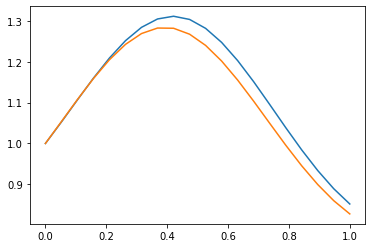

In [50]:
n= 20
xs = linspace(0,1,n) #generate n points
h = xs[1]-xs[0] #1/n-1
ys = zeros(n) #empty list of values y(xs)
ys[0] = 1 #starting point
for i in range(n-1):
    x = xs[i]
    y = ys[i]
    ys[i+1] = y+h*F(x,y)
zs = [exact(x) for x in xs]

plot(xs,ys)
plot(xs,zs)

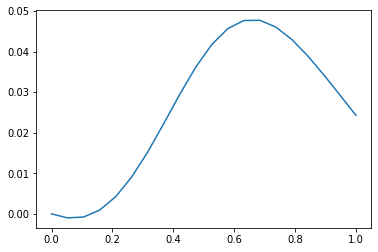

In [51]:
plot(xs,ys-zs) #error

14) Runge-Kutta Method

2nd Order

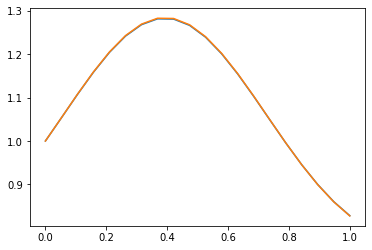

In [52]:
#same setup as Euler's
n = 20
xs = linspace(0,1,n) #generate n points
h = xs[1]-xs[0] #1/n-1
ys = zeros(n) #empty list of values y(xs)
ys[0] = 1 #starting point
for i in range(n-1):
    x = xs[i]
    y = ys[i]
    K0 = h*F(x,y)
    K1 = h*F(x+h,y+K0)
    ys[i+1] = y+K0/2+K1/2
zs = [exact(x) for x in xs]

plot(xs,ys)
plot(xs,zs)

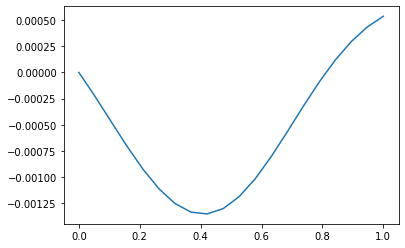

In [30]:
plot(xs,ys-zs) #error

4th Order

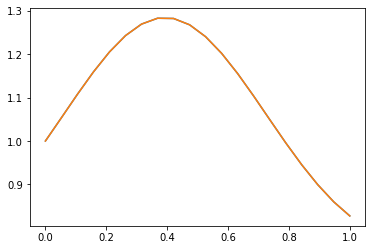

In [31]:
#same setup as 2nd order
n= 20
xs = linspace(0,1,n) #generate n points
h = xs[1]-xs[0] #1/n-1
ys = zeros(n) #empty list of values y(xs)
ys[0] = 1 #starting point
for i in range(n-1):
    x = xs[i]
    y = ys[i]
    K0 = h*F(x,y)
    K1 = h*F(x+h/2,y+K0/2)
    K2 = h*F(x+h/2,y+K1/2)
    K3 = h*F(x+h,y+K2)
    ys[i+1] = y+(1/6)*(K0+2*K1+2*K2+K3)
zs = [exact(x) for x in xs]
    
plot(xs,ys)
plot(xs,zs)

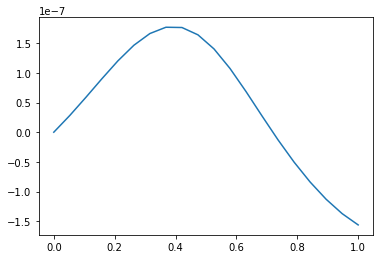

In [32]:
plot(xs,ys-zs) #error

15) Shooting Method

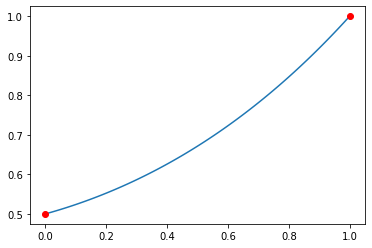

In [33]:
ts = linspace(0,1,100);
h = ts[1]-ts[0]
y0 = [1/2]
y1 = [0.21548361751961317] # just to try, not known
for i in range(99):
    y0.append(y0[-1]+y1[-1]*h) # like last time, the role of F is played by y1
    y1.append(y1[-1]+sin(y0[-1])*h)
plot(ts,y0)
plot([0,1],[1/2,1],"ro") # now it works perfectly

In [34]:
def displacement(alpha):
    ts = linspace(0,1,100);
    h = ts[1]-ts[0]
    y0 = [1/2]
    y1 = [alpha] 
    for i in range(99):
        y0.append(y0[-1]+y1[-1]*h) # like last time, the role of F is played by y1
        y1.append(y1[-1]+sin(y0[-1])*h)
    return y0[-1]-1 # computes how far we are from the target

displacement(1/4-2/100)

0.016440700592511348

In [35]:
def f(x):
    return displacement(x)
def df(x):
    h = 1/1000
    return (f(x+h)-f(x-h))/(2*h) # numerical differentiation
def newton(f,df,x0):
    xs = [x0]
    for i in range(10):
        xs.append(xs[-1]-f(xs[-1])/df(xs[-1]))
    return xs[-1]
newton(f,df,1/4) # result

0.21548361751961317

16) Euler-Maruyama Method

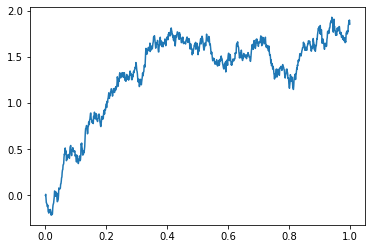

In [36]:
def brownian(T,sigma):
    dt=0.001;
    ts = arange(0,T,dt)
    N = ts.size
    xs = zeros(N)
    xs[0]=0
    sdt = sqrt(1*dt)
    for i in arange(1,N):
        xs[i] = xs[i-1] + sigma*random.normal(0,sdt)
    return ts, xs

ts,xs = brownian(1,1)
plot(ts,xs)